# DEEP LEARNING FOR COMPUTER VISION: <br> A PRACTITIONER'S VIEWPOINT

### André Panisson <br> Alan Perotti 
#### ISI Foundation
---

# Introduction

DON'T EDIT THIS NOTEBOOK! COPY IT ON A FOLDER OF YOURS
<br>
Disclaimers, overview, etc.
<br>
Run the system requirements notebook

In [71]:
import numpy as np

# Computer Vision

Vision is hard for machines..

<img src="./figures/linea.png" width="250"/>
<img src="./figures/bignum.png" width="250"/>

Relevant XKCD (2014!)

<img src="./figures/xkcd.png" width="400"/>

A couple years later, a 50MB apk on Android, offline..

<tr>
    <td> <img src="./figures/bird.JPG" style="width: 500px;"/> </td>
</tr>

..and it all started with Alexnet! <3

<tr>
    <td> <img src="./figures/imagenet.png" style="width: 500px;"/> </td>
</tr>

So why is this hard again? Easy: you can't define a '2'

<tr><td><img src="./figures/mnist.png" style="width: 700px;"/></td></tr>

# Convolutional Neural Networks

So how do machines see? Hierarchically!

<tr><td><img src="./figures/hierarchical_features.png" style="width: 700px;"/></td></tr>

Ok, but how?

<tr>
    <td> <img src="https://flickrcode.files.wordpress.com/2014/10/conv-net2.png" alt="Drawing" style="width: 800px;"/> </td>
</tr>

Key ingredient: the convolution

<img src="https://docs.microsoft.com/en-us/cognitive-toolkit/tutorial2/convlayer.png" alt="Drawing" style="width: 700px;"/>

Also used: maxpooling

<img src="https://qph.fs.quoracdn.net/main-qimg-8afedfb2f82f279781bfefa269bc6a90.webp" alt="Drawing" style="width: 500px;"/>
<br><br><br>

<img src="https://qph.fs.quoracdn.net/main-qimg-3a8a3a78734fed3301ed3546634b871a.webp" alt="Drawing" style="width: 500px;"/>  

# Keras

## Introduction to Keras

Keras is a minimalist, highly modular neural network library written in Python and built on top of Tensorflow and Theano. It is easier to use than pure Tensorflow, as it includes several functionalities:

- Standard APIs for sequential and functional models with feedforward, convolutional, and recurrent layers
- Several optimization algorithms and advanced activation functions
- Monitoring/callback support
- Easily extensible

Simple models, such as feedforward networks, are straightforward to implement. The code below is the entire definition of a multilayer perceptron classifier for the MNIST dataset:

In [72]:
from keras.models import Model
from keras.layers import Input, Dense

input = Input(shape=(784,))
hidden = Dense(128, activation='relu')(input) #input_shape=(784,)
pred = Dense(10, activation='softmax')(hidden)

model0 = Model(inputs=input, outputs=pred)

model0.summary()
model0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [73]:
#Q: why these numbers?

If you prefer to define a squence of layers, you can use the Sequential model definition:

In [74]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(128, input_shape=(784,), activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [75]:
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [76]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist1 = model1.fit(X_train.reshape(-1, 784), Y_train,
          validation_data=(X_test.reshape(-1, 784), Y_test),
          epochs=10, batch_size=100, verbose=1)
# Final evaluation of the model
scores = model1.evaluate(X_test.reshape(-1, 784), Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3424 - acc: 0.9052 - val_loss: 0.1899 - val_acc: 0.9461
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1571 - acc: 0.9549 - val_loss: 0.1329 - val_acc: 0.9625
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1132 - acc: 0.9672 - val_loss: 0.1092 - val_acc: 0.9663
Epoch 4/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0867 - acc: 0.9749 - val_loss: 0.0923 - val_acc: 0.9725
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0696 - acc: 0.9796 - val_loss: 0.0847 - val_acc: 0.9747
Epoch 6/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0568 - acc: 0.9836 - val_loss: 0.0845 - val_acc: 0.9730
Epoch 7/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.0469 - acc: 0.9863 - val_loss: 0.0744 - val_acc

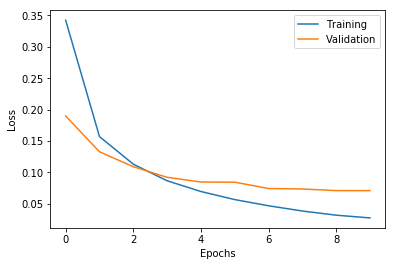

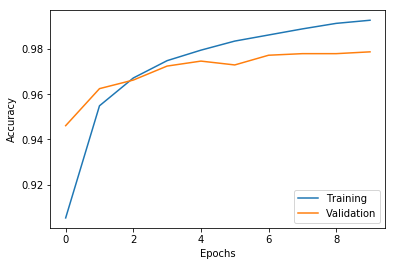

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_curves(hist):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    
plot_curves(hist1)

In [78]:
import keras.datasets
print(dir(keras.datasets))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'boston_housing', 'cifar', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [79]:
print(keras.backend.image_data_format())
#'channels_last' -> (batch_size, rows, cols, channels)
#'channels_first' -> (batch_size, channels, rows, cols)

channels_last


In [80]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [81]:
X_train.shape

(50000, 32, 32, 3)

In [82]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

n_input = 32*32*3 # CIFAR data input (img shape: 32*32 * 3 channels)
n_classes = 10 # CIFAR total classes

Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)

In [83]:
print(X_train.shape, Y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [84]:
print(Y_train[0],Y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


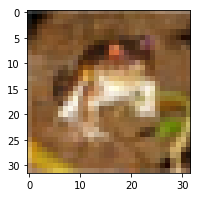

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(X_train[0])
plt.show()

#### Convolution2D

```python
from keras.layers.convolutional import Conv2D

Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', 
       data_format=None, dilation_rate=(1, 1), activation=None, 
       use_bias=True, kernel_initializer='glorot_uniform', 
       bias_initializer='zeros', kernel_regularizer=None, 
       bias_regularizer=None, activity_regularizer=None, 
       kernel_constraint=None, bias_constraint=None)
```

#### Arguments:

<ul>
<li><strong>filters</strong>: Integer, the dimensionality of the output space
    (i.e. the number output of filters in the convolution).</li>
<li><strong>kernel_size</strong>: An integer or tuple/list of 2 integers, specifying the
    width and height of the 2D convolution window.
    Can be a single integer to specify the same value for
    all spatial dimensions.</li>
<li><strong>strides</strong>: An integer or tuple/list of 2 integers,
    specifying the strides of the convolution along the width and height.
    Can be a single integer to specify the same value for
    all spatial dimensions.
    Specifying any stride value != 1 is incompatible with specifying
    any <code>dilation_rate</code> value != 1.</li>
<li><strong>padding</strong>: one of <code>"valid"</code> or <code>"same"</code> (case-insensitive).</li>
<li><strong>data_format</strong>: A string,
    one of <code>channels_last</code> (default) or <code>channels_first</code>.
    The ordering of the dimensions in the inputs.
    <code>channels_last</code> corresponds to inputs with shape
    <code>(batch, height, width, channels)</code> while <code>channels_first</code>
    corresponds to inputs with shape
    <code>(batch, channels, height, width)</code>.
    It defaults to the <code>image_data_format</code> value found in your
    Keras config file at <code>~/.keras/keras.json</code>.
    If you never set it, then it will be "channels_last".</li>
<li><strong>dilation_rate</strong>: an integer or tuple/list of 2 integers, specifying
    the dilation rate to use for dilated convolution.
    Can be a single integer to specify the same value for
    all spatial dimensions.
    Currently, specifying any <code>dilation_rate</code> value != 1 is
    incompatible with specifying any stride value != 1.</li>
<li><strong>activation</strong>: Activation function to use
    (see <a href="https://keras.io/activations/">activations</a>).
    If you don't specify anything, no activation is applied
    (ie. "linear" activation: <code>a(x) = x</code>).</li>
<li><strong>use_bias</strong>: Boolean, whether the layer uses a bias vector.</li>
<li><strong>kernel_initializer</strong>: Initializer for the <code>kernel</code> weights matrix
    (see <a href="https://keras.io/initializers/">initializers</a>).</li>
<li><strong>bias_initializer</strong>: Initializer for the bias vector
    (see <a href="https://keras.io/initializers/">initializers</a>).</li>
<li><strong>kernel_regularizer</strong>: Regularizer function applied to
    the <code>kernel</code> weights matrix
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>bias_regularizer</strong>: Regularizer function applied to the bias vector
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>activity_regularizer</strong>: Regularizer function applied to
    the output of the layer (its "activation").
    (see <a href="https://keras.io/regularizers/">regularizer</a>).</li>
<li><strong>kernel_constraint</strong>: Constraint function applied to the kernel matrix
    (see <a href="https://keras.io/constraints/">constraints</a>).</li>
<li><strong>bias_constraint</strong>: Constraint function applied to the bias vector
    (see <a href="https://keras.io/constraints/">constraints</a>).</li>
</ul>

<img src="https://docs.microsoft.com/en-us/cognitive-toolkit/tutorial2/convlayer.png" alt="Drawing" style="width: 700px;"/>

In [86]:
#Q: where does the feature map come from?

# Building a ConvNet

Let's build a Convolutional Neural Network with the following architecture:

- input: images with (32x32x3) pixels
- conv layer with 16 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- conv layer with 20 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- conv layer with 20 5x5 filters, padding=same and ReLU activation
- 2x2 max pool layer
- fully connected layer with 10 neurons (10 classes) and softmax activation

We will then train this model with the Cifar10 dataset (`keras.datasets.cifar10`), minimizing a categorical crossentropy loss with the Adam optimizer.

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D

In [88]:
def conv_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(16, (5, 5), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(20, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(20, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = conv_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 20)        8020      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 20)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 20)          10020     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 320)               0         
__________

Reference for Keras optimization algorithms:   
https://keras.io/optimizers/

In [89]:
#Q: again, why these numbers?

# Training

In [90]:
# Fit the model
hist = model.fit(X_train[:1000], Y_train[:1000],
          validation_data=(X_test, Y_test),
          epochs=20, batch_size=100, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 1000 samples, validate on 10000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2998 - acc: 0.0920 - val_loss: 2.2888 - val_acc: 0.1175
Epoch 2/20
1000/1000 [==============================] - 1s 756us/step - loss: 2.2618 - acc: 0.1440 - val_loss: 2.2428 - val_acc: 0.1823
Epoch 3/20
1000/1000 [==============================] - 1s 762us/step - loss: 2.1821 - acc: 0.2140 - val_loss: 2.1833 - val_acc: 0.1869
Epoch 4/20
1000/1000 [==============================] - 1s 760us/step - loss: 2.0458 - acc: 0.2900 - val_loss: 2.0310 - val_acc: 0.2678
Epoch 5/20
1000/1000 [==============================] - 1s 764us/step - loss: 1.9109 - acc: 0.2890 - val_loss: 1.9300 - val_acc: 0.3025
Epoch 6/20
1000/1000 [==============================] - 1s 765us/step - loss: 1.8126 - acc: 0.3370 - val_loss: 1.8409 - val_acc: 0.3267
Epoch 7/20
1000/1000 [==============================] - 1s 758us/step - loss: 1.7222 - acc: 0.3660 - val_loss: 1.7891 - val_acc: 0.3536
E

<br><br><br>
<tr>
    <td> <img src="./figures/xkcd2.jpg" style="width: 300px;"/> </td>
</tr>

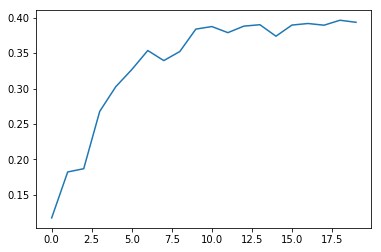

In [91]:
plt.plot(hist.history['val_acc'])

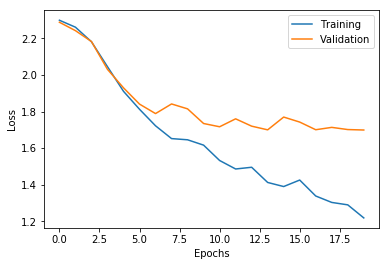

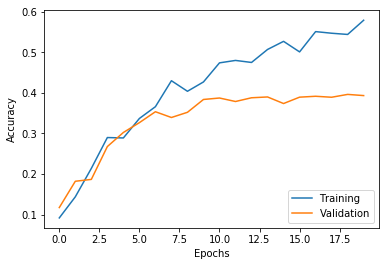

In [92]:
plot_curves(hist)

In [93]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()
predicted = model.predict(X_test).argmax(-1)

In [94]:
cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

6066/10000 misclassified examples



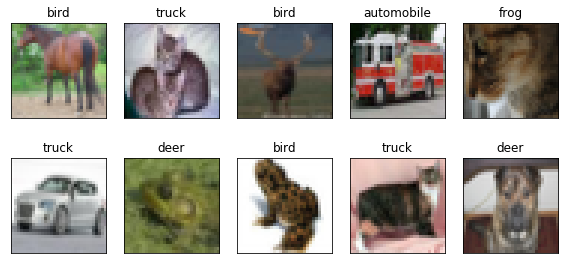

In [95]:
misclassified = [i for i,(p,l) in enumerate(zip(predicted,Y_test_orig)) if not p==l]
print(len(misclassified),'/10000 misclassified examples\n',sep="")

plt.rc("image", cmap="binary")
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    index = np.random.choice(misclassified)
    plt.imshow(X_test_orig[index])
    plt.title(cifar10_labels[predicted[index]])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

### (nice checkout list)
https://blog.slavv.com/37-reasons-why-your-neural-network-is-not-working-4020854bd607